In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics


In [2]:
df = pd.read_csv('temperature.csv')
x = df[['Temperature-T']]
y = df[['Thermal expansion coefficient']]

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .5, random_state = 101)

variance_values = []
n = len(y_test) 
min_variance_value = 9999

for m in np.arange(1, 10):
    poly_reg = PolynomialFeatures(degree = m)
    x_poly_train = poly_reg.fit_transform(x_train)
    x_poly_test=poly_reg.transform(x_test)
    
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(x_poly_train, y_train)
    predictions_Poly=lin_reg_2.predict(x_poly_test)
    
    sr = metrics.mean_squared_error(y_test, predictions_Poly)
    variance_value = sr / (n-m-1) 
    variance_value = round(variance_value, 4) 
    variance_values.append(variance_value) 
   
    if min_variance_value >= variance_value:
        min_variance_value = variance_value
        min_deg = m

print("Optimum Order is  %d" % (min_deg))
print("Minimum variance is  %0.4f" % (min_variance_value))
print("Variance values:\n", variance_values)

Optimum Order is  3
Minimum variance is  0.0010
Variance values:
 [0.0082, 0.0011, 0.001, 0.0013, 0.0026, 0.0246, 3.5454, 1.3203, 2.9442]


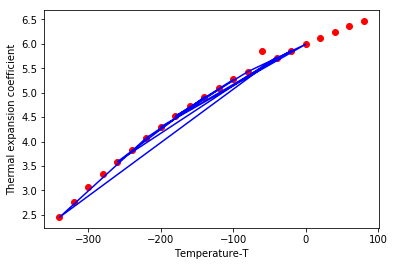

In [4]:
poly_reg = PolynomialFeatures(degree = min_deg)
x_poly_train = poly_reg.fit_transform(x_train)
x_poly_test=poly_reg.transform(x_test)
    
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly_train, y_train)
    
predictions_Poly=lin_reg_2.predict(x_poly_test)

plt.scatter(df['Temperature-T'],df['Thermal expansion coefficient'], color = 'red')
plt.plot(x_train, lin_reg_2.predict(poly_reg.fit_transform(x_train)), color = 'blue')
plt.xlabel('Temperature-T')
plt.ylabel('Thermal expansion coefficient')
plt.show()


In [5]:
reg3=Ridge(alpha=.5)
reg3.fit(x_poly_train, y_train)
predictions_Ridge=reg3.predict(x_poly_test)
sr = metrics.mean_squared_error(y_test,predictions_Ridge)
sr

0.00722674154288738

In [ ]:
reg4=Lasso(alpha=0.1)
reg4.fit(x_poly_train, y_train)
predictions_Lasso=reg4.predict(x_poly_test)
sr = metrics.mean_squared_error(y_test,predictions_Lasso)
sr